# Improving Employee Retention By Predicting Employee Attrition Using Machine Learning

**Project Overview**:<br>
In this Mini Project, I have a role as a member of the Data Scientist team at a technology start-up company. The company is currently experiencing big problems; many employees have submitted their resignations, but the company has not yet decided on this matter. I will help the company to explain the current condition of its employees, as well as explore the problems within the company that cause employees to resign so that they can reduce the rate of employee resignations and outline a strategy that can increase employee retention. I will present descriptive findings from data using data visualization and data storytelling. I can get inferential findings using statistical analysis, or machine learning approaches with frameworks such as Interpretable & Explainable AI to convert model findings into a story.<br><br>

**Project Goals**:<br>
1. *Reduce Employee Resignation/Attrition Rate*.<br>This is the ultimate goal this project aims to achieve. By understanding the reasons behind employee resignations, the company can take stepsto make the workplace more attractive and retaint the employees.
2. *Improve employee retention*.<br>Retaining existing employee is generally cheaper and more efficient than hiring and training new ones. This project aims to identify strategies that will encourage employees to stay with the company.<br>

**Project Objective**:<br>
1. Understand the current state of employee sentiment.
2. Identify the root causes of employee resignations.
3. Develop data-driven recommendations to improve employee retention.
4. Communicate insights effectively.
5. Develop a predictive model to predict employee attrition.<br>

**Project Business Metrics**:<br>
1. Attrition Rate.
2. Time to fill open positions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
data_ori = pd.read_csv('../data/hr_data.csv')
pd.set_option('display.max_columns', None)

## Task 1 - Data Preprocessing
**Task Goals**:<br>
Preparing raw data into clean data and ready to be processed for analysis and machine learning modelling.<br><br>
**Task Objectives**:<br>
1. Checking whole data information.
2. Checking missing values.
3. Checking duplicate values.
4. Checking Statistical summary of categorical and numerical features.

Data Perprocessing<br>
- Missing values checking
- Duplicate values checking
- Drop unnecessary columns
- Fix invalid values    

In [4]:
display(data_ori.info())

display(data_ori.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

None

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24


Information obtained about the data:
- Data size is 287 rows and 25 columns
- There are missing values in the data
- There are numerical, categorical, and (supposed to be) datetime columns
- There are no target columns, will create one from `TanggalResign` column because the date when the employee resigns are the indicator of the employee have resigned.   

Checking and Handling Missing Values

In [5]:
null_val = data_ori.isnull().sum()
null_val = round(null_val[null_val > 0] / data_ori.shape[0] * 100, 2)
print(f'Proportion of missing values in the dataset:\n\n{null_val}')

Proportion of missing values in the dataset:

SkorKepuasanPegawai                    1.74
JumlahKeikutsertaanProjek              1.05
JumlahKeterlambatanSebulanTerakhir     0.35
JumlahKetidakhadiran                   2.09
IkutProgramLOP                        89.90
AlasanResign                          23.00
dtype: float64


Dive into missing values in `AlasanResign` column

In [6]:
resign_nan = data_ori[data_ori['AlasanResign'].isna()]
resign_nan[['AlasanResign', 'TanggalResign']]

,AlasanResign,TanggalResign
105,NaN,-
187,NaN,-
189,NaN,-
190,NaN,-
195,NaN,-
...,...,...
279,NaN,-
280,NaN,-
281,NaN,-
282,NaN,-


Findings:
- `IkutProgramLOP` has too many missing values (more than 85% from total data), I decided to drop this column because it has too many missing information.
- As we can see when the AlasanResign is missing, the `TanggalResign` value is '-', this means that the employee has not resigned yet. So, it will be more appropriate to fill the missing values in `AlasanResign` with 'masih_bekerja' value.
- Because most of the daata is Categorical, rest of the columns with missing values will be imputed with modus.

In [7]:
# Create a copy of the original data to avoid modifying the original data
# Copy data for EDAs
data_eda = data_ori.copy()

# Drop IkutProgramLOP columns
data_eda = data_eda.drop(columns='IkutProgramLOP')

# Fill missing values on AlasanResign with 'Unkown'
data_eda['AlasanResign'] = data_eda['AlasanResign'].fillna('masih_bekerja')

# Defube column that still coonatin missing values
missing = [
    'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 
    'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran'
]

# fill rest of the missing values with median
for col in missing:
    data_eda[col] = data_eda[col].fillna(data_eda[col].mode()[0])

# Check if there are any missing values left
null_val2 = data_eda.isnull().sum().sum()
print(f'Missing values left: {null_val2}')

Missing values left: 0


Checking Duplicate Values

In [8]:
total_dupl = data_eda.duplicated().sum()
print(f'Total number of duplicated rows in the data: {total_dupl}')

Total number of duplicated rows in the data: 0


In [9]:
# data_ori['EnterpriseID'] = data_ori['EnterpriseID'].astype('object')
categorical = data_eda.select_dtypes('object')

print('Statistical summary for Categorical data:')
display(categorical.describe())

Statistical summary for Categorical data:


,Username,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287
unique,285,5,2,3,14,3,5,5,9,287,287,3,2,11,284,97,127,53
top,boredEggs0,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Sarjana,1,masih_bekerja,1987-06-14,2011-01-10,2020-1-14,-
freq,2,132,167,217,109,169,85,72,85,1,1,176,286,198,2,12,17,198


From statistical summary of the categorical data above we can see that:
- There's no column with only 1 unique value.
- There's 2 columns with pretty much unique values, `Pekerjaan` and `HiringPlatform`.(Other than identifier columns)
- There are 4 people with the same username, lets take colser look on the data again.

In [10]:
data_eda[data_eda.Username.duplicated()]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
120,brainyMagpie7,101264,Bercerai,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Kurang,Jakarta Barat,Indeed,4,3.0,6.0,0.0,17.0,+6285946196xxx,brainyMagpie7608@proton.com,Magister,1,masih_bekerja,1970-04-25,2017-02-10,2020-2-25,-
204,boredEggs0,106285,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,3,3.0,0.0,0.0,12.0,+6285733263xxx,boredEggs0225@outlook.com,Sarjana,1,jam_kerja,1967-06-03,2013-04-01,2020-2-13,2014-8-19


In [11]:
display(data_eda[data_eda.Username=='boredEggs0'])
display(data_eda[data_eda.Username=='brainyMagpie7'])

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
158,boredEggs0,100326,Bercerai,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,3,4.0,0.0,0.0,12.0,+6283854646xxx,boredEggs0834@outlook.com,Sarjana,1,ganti_karir,1974-01-12,2011-01-10,2017-1-30,2016-3-31
204,boredEggs0,106285,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,3,3.0,0.0,0.0,12.0,+6285733263xxx,boredEggs0225@outlook.com,Sarjana,1,jam_kerja,1967-06-03,2013-04-01,2020-2-13,2014-8-19


,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
80,brainyMagpie7,106620,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,2,5.0,5.0,0.0,9.0,+6281267984xxx,brainyMagpie7048@gmail.com,Doktor,1,internal_conflict,1986-09-01,2014-9-29,2020-1-18,2019-06-06
120,brainyMagpie7,101264,Bercerai,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Kurang,Jakarta Barat,Indeed,4,3.0,6.0,0.0,17.0,+6285946196xxx,brainyMagpie7608@proton.com,Magister,1,masih_bekerja,1970-04-25,2017-02-10,2020-2-25,-


They have different privacy data(different birth, telephone, email, etc). so I decided to keep all of them because they are not considered as a duplicate data.

In [12]:
numerical = data_eda.select_dtypes('number')
print('Statistical summary for Numerical data:\n')
display(numerical.describe())

Statistical summary for Numerical data:



,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,105923.324042,3.101045,3.888502,1.167247,0.411150,10.271777
std,4044.977599,0.836388,0.913060,2.285537,1.273018,6.935971
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,4.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000


All of the columns are considered as categorical data, which means if we see the data statistical summary we can't say that the data is normally distributed or skewed, because the data is categorical data.

## Feature Engineering

Checking values each columns to make sure the value is valid

In [13]:
for col in data_eda.columns:
    print(f'Value counts for {data_eda[col].value_counts()}\n')

Value counts for Username
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: count, Length: 285, dtype: int64

Value counts for EnterpriseID
111065    1
106008    1
100869    1
101560    1
100874    1
         ..
105429    1
106638    1
100919    1
101306    1
106214    1
Name: count, Length: 287, dtype: int64

Value counts for StatusPernikahan
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: count, dtype: int64

Value counts for JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64

Value counts for StatusKepegawaian
FullTime      217
Outsource      66
Internship      4
Name: count, dtype: int64

Value counts for Pekerjaan
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software 

In [14]:
invalid_reason = data_eda[data_eda.AlasanResign=='Product Design (UI & UX)']
invalid_reason['Pekerjaan']

27     Software Engineer (Front End)
124         Product Design (UI & UX)
147    Software Engineer (Front End)
203     Software Engineer (Back End)
Name: Pekerjaan, dtype: object

From the value counts of each columns there are some invalid values/values that need to be adjusted in the data:
- `StatusPernikahan` has '-' value, I will replace it with 'Unknown'.
- `PernahBekerja` has '1' value with 286 counts, but our data only has 287 rows, I will drop this column because it has no information.
- For `AlasanResign` with invalid values `Product Design (UI & UX)`, this value is a job title and because of that it will be replaced with 'Unknown' instead.

In [15]:
# Create function to feature engineer the data for feat eng the train and test data later
def feat_eng(data):
    """
    This function will feature engineer the data from cleaning the data(replacing values) to creating new columns

    Parameters:
    data: DataFrame, the data to be feature engineered

    Returns:
    data: DataFrame, the feature engineered data

    Example:
    >>> data_processed = feat_eng(data_ori)
    """
    # Replace '-' value in StatusPernikahan with 'Unknown'
    data['StatusPernikahan'] = data['StatusPernikahan'].replace('-', 'Unknown')

    # Replace 'Product Design (UI & UX)' in AlasanResign with 'Product Design'
    data['AlasanResign'] = data['AlasanResign'].replace('Product Design (UI & UX)', 'Unknown')

    # Create new 'Age' column from 'TanggalLahir'
    # Convert 'TanggalLahir to datetime format
    data['TanggalLahir'] = pd.to_datetime(data['TanggalLahir'])

    # Define year now
    year_now = datetime.now().year

    # Calculate age from 'TanggalLahir'
    data['Age'] = year_now - data['TanggalLahir'].dt.year

    # Convert 'TanggalHiring' to datetime format
    data['TanggalHiring'] = pd.to_datetime(data['TanggalHiring'])

    # Create new column 'HiringYear' from 'TanggalHiring'
    data['HiringYear'] = data['TanggalHiring'].dt.year

    # Calculate 'EmploymentTenure' from 'TanggalHiring'
    data['EmploymentTenure'] = year_now - data['HiringYear']

    # Create target column 'Resign' from 'TanggalResign'
    data['Resign'] = data['TanggalResign'].apply(lambda x: 'No' if x == '-' else 'Yes')

    # Replace '-' value in 'TanggalResign' with nan
    data['TanggalResign'] = data['TanggalResign'].replace('-', np.nan)

    # Convert 'TanggalResign' to datetime format
    data['TanggalResign'] = pd.to_datetime(data['TanggalResign'])

    # Create new column 'ResignYear' from 'TanggalResign'
    data['ResignYear'] = data['TanggalResign'].dt.year
    
    # data['ResignYear'] = data['ResignYear'].astype(int)

    return data

# Drop 'PernahBekerja' and other unnecessary columns(identifiers)
# data_proc1 = data_proc.drop(columns=['PernahBekerja', 'Username', 'EnterpriseID', 'NomorHP', 'Email', 'TanggalLahir', 'TanggalHiring'])

In [16]:
# Apply feature engineering function to the data
data_eda1 = feat_eng(data_eda)

# Display the data after feature engineering
display(data_eda1.head(3))

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Age,HiringYear,EmploymentTenure,Resign,ResignYear
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,NaT,52,2011,13,No,NaN
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,40,2014,10,Yes,2018.0
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,50,2011,13,Yes,2014.0


## Task 2 - Annual Report on Employee Number Changes
**Task Goals**:<br>
Creating an annual report on the number of employees in the company.<br><br>
**Task Objectives**:<br>
1. Create 2 aggregated tables for the number of employees hired and resigned each year.
2. Join the 2 tables into 1 table.
3. Impute the missing values on the missing years.
4. Count total the employee who resigned and still working each year.
5. Make a visualization of the annual report.
6. Interpret the annual report.

In [49]:
# Create aggregated tables for number of employees hired and resigned each year
resign_agg = data_eda1.groupby('ResignYear')['EnterpriseID'].count().reset_index(name='TotalResign')
hire_agg =  data_eda1.groupby('HiringYear')['EnterpriseID'].count().reset_index(name='TotalHiring')

# Kpom the 2 aggregated tables with outer join because there's missing year in the data
metrics_agg = pd.merge(resign_agg, hire_agg, left_on='ResignYear', right_on='HiringYear', how='outer')

# Impute missing values in the aggregated table
# Define columns to fill missing values
cols_fillna = {
    'ResignYear': 'HiringYear',
    'TotalResign': 0,
    'HiringYear': 'ResignYear',
    'TotalHiring': 0
}

# Fill/Impute missing values
for col, fill_value in cols_fillna.items():
    if isinstance(fill_value, str):
        metrics_agg[col] = metrics_agg[col].fillna(metrics_agg[fill_value])
    else:
        metrics_agg[col] = metrics_agg[col].fillna(fill_value)

# Set only 1 year column for the year
# Rename Resign Year as the year
rename_yr = {'ResignYear': 'Year'}
metrics_agg = metrics_agg.rename(columns=rename_yr)
metrics_agg.drop(columns='HiringYear', inplace=True)

# Change the Year dtype to int for better view
metrics_agg['Year'] = metrics_agg['Year'].astype(int)

# Create a new column by Calculate the difference between TotalHiring and TotalResign for each year
metrics_agg['NetHires'] = metrics_agg['TotalHiring'] - metrics_agg['TotalResign']

# Create new column by calculate the cumulative sum of TotalHiring over the years
metrics_agg['CumulativeHiring'] = metrics_agg['TotalHiring'].cumsum()

# Create a new column by calculate the cumulative sum of TotalResign over the years
metrics_agg['CumulativeResign'] = metrics_agg['TotalResign'].cumsum()

# Create a new column by calculate the remaining employees for each year
# by subtracting the cumulative resignations from the cumulative hirings
metrics_agg['RemainEmp'] = metrics_agg['CumulativeHiring'] - metrics_agg['CumulativeResign']

metrics_agg

,Year,TotalResign,TotalHiring,NetHires,CumulativeHiring,CumulativeResign,RemainEmp
0,2006,0.0,1.0,1.0,1.0,0.0,1.0
1,2007,0.0,2.0,2.0,3.0,0.0,3.0
2,2008,0.0,2.0,2.0,5.0,0.0,5.0
3,2009,0.0,7.0,7.0,12.0,0.0,12.0
4,2010,0.0,8.0,8.0,20.0,0.0,20.0
5,2011,0.0,76.0,76.0,96.0,0.0,96.0
6,2012,0.0,41.0,41.0,137.0,0.0,137.0
7,2013,5.0,43.0,38.0,180.0,5.0,175.0
8,2014,12.0,56.0,44.0,236.0,17.0,219.0
9,2015,8.0,31.0,23.0,267.0,25.0,242.0


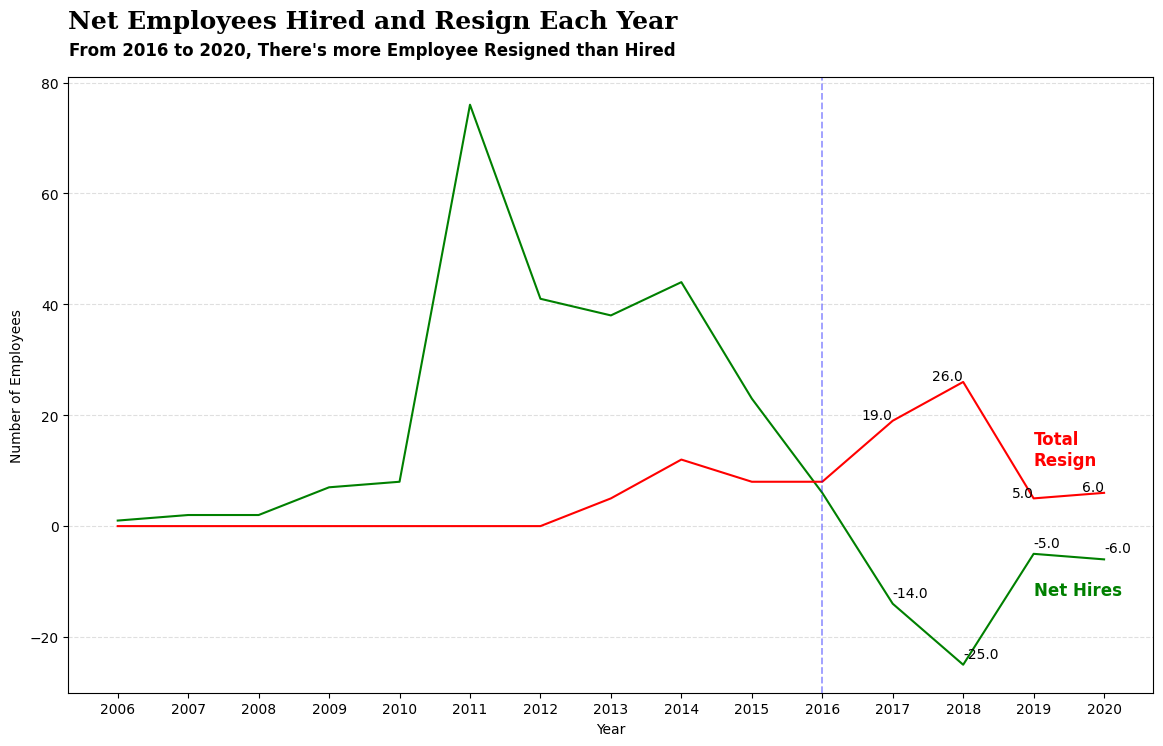

In [102]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Year', 
    y='NetHires',
    data=metrics_agg,
    # marker='o',
    color='g'
)
sns.lineplot(
    x='Year', 
    y='TotalResign', 
    data=metrics_agg,
    # marker='o', 
    color='r'
)

for i in range(len(metrics_agg)):
    if metrics_agg['Year'].iloc[i] >= 2017:
        plt.annotate(
            metrics_agg['NetHires'].iloc[i],
            (metrics_agg['Year'].iloc[i], metrics_agg['NetHires'].iloc[i]),
            textcoords='offset points',
            xytext=(0, 5),
            ha='left'
        )
        plt.annotate(
            metrics_agg['TotalResign'].iloc[i],
            (metrics_agg['Year'].iloc[i], metrics_agg['TotalResign'].iloc[i]),
            textcoords='offset points',
            xytext=(0, 1),
            ha='right'
        )

plt.xticks(metrics_agg['Year'])
# plt.yticks(np.arange(-20, 80, 10))
plt.ylabel('Number of Employees')
fdbold = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 18}
plt.title('Net Employees Hired and Resign Each Year', fontdict=fdbold, pad=35, loc='left')
plt.text(2019, -12.5, 'Net Hires', color='g', fontsize=12, weight='bold')
plt.text(2019, 11, 'Total\nResign', color='r', fontsize=12, weight='bold')
plt.text(2005.31, 85, "From 2016 to 2020, There's more Employee Resigned than Hired", fontsize=12, weight='bold', color='black')
plt.axvline(2016, color='b', linewidth=1.3, alpha=0.4, linestyle='--')


plt.grid(axis='y', linestyle='--', alpha=0.4)

# plt.ylim(min(metrics_agg['RemainEmp'].min(), metrics_agg['NetHires'].min()), max(metrics_agg['RemainEmp'].max(), metrics_agg['NetHires'].max()))
plt.show()

In [ ]:
# plt.figure(figsize=(14, 8))
# sns.lineplot(
#     x='Year', 
#     y='NetHires',
#     data=metrics_agg,
#     # marker='o',
#     color='g'
# )
# sns.lineplot(
#     x='Year', 
#     y='CumulativeResign', 
#     data=metrics_agg,
#     # marker='o', 
#     color='r'
# )

# plt.xticks(metrics_agg['Year'])
# # plt.yticks(np.arange(-20, 80, 10))
# plt.ylabel('Number of Employees')
# fdbold = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 18}
# plt.title('Net Hires and Cummulative Resignations Employees Each Year', fontdict=fdbold, pad=35, loc='left')
# plt.text(2019, -12.5, 'Net Hires', color='g', fontsize=12, weight='bold')
# plt.text(2018.8, 72, 'Cumulative\nResignations', color='r', fontsize=12, weight='bold')
# plt.text(2005.31, 100, 'Employee Resignations increase significantly from 2013 to 2020', fontsize=12, weight='bold', color='black')

# # plt.hlines(0, metrics_agg['Year'].min(), metrics_agg['Year'].max(), colors='black', linestyles='solid', alpha=0.7)
# plt.grid(axis='y', linestyle='--', alpha=0.4)

# # plt.ylim(min(metrics_agg['RemainEmp'].min(), metrics_agg['NetHires'].min()), max(metrics_agg['RemainEmp'].max(), metrics_agg['NetHires'].max()))
# plt.show()

In [ ]:
# import plotly.graph_objects as go

# # Create a list of measures to plot
# measures = ['relative' if remainemp >= 0 else 'relative' for remainemp in metrics_agg['RemainEmp']]

# # Create a list of colors for the plot
# colors = ['green' if remainemp >= 0 else 'red' for remainemp in metrics_agg['RemainEmp']]

# # Create waterfall chart
# fig = go.Figure(go.Waterfall(
#     name='20', orientation='v',
#     measure=measures,
#     x=metrics_agg['Year'],
#     y=metrics_agg['Diff'],
#     connector={'line': {'color': 'rgb(63, 63, 63)'}},
#     decreasing={'marker': {'color': 'red'}},
#     increasing={'marker': {'color': 'green'}},
#     totals={'marker': {'color': 'blue'}}
# ))

# # Update the layout of the plot
# fig.update_layout(
#     title='Waterfall Chart of Employee Movement',
#     showlegend=True,
#     xaxis_title='Year',
#     yaxis_title='Number of Employees',
#     bargap=0.5,
#     height=700,
#     width=1000

# )

# # Show the plot
# fig.show()
